In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [3]:
from preprocessing import dividir_dataset
from preprocessing import preparar_dataset
from preprocessing import normalizar_datos

In [4]:
from funcionesAuxiliares import graficar_auc_roc
from funcionesAuxiliares import traer_df

In [1]:
df = traer_df()
df = preparar_dataset(df)

NameError: name 'preparar_dataset' is not defined

In [8]:
X, y = dividir_dataset(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

                                 precision    recall  f1-score   support

No Tiene Alto Valor Adquisitivo       0.88      0.91      0.90      6159
   Tiene Alto Valor Adquisitivo       0.70      0.63      0.66      1982

                       accuracy                           0.84      8141
                      macro avg       0.79      0.77      0.78      8141
                   weighted avg       0.84      0.84      0.84      8141



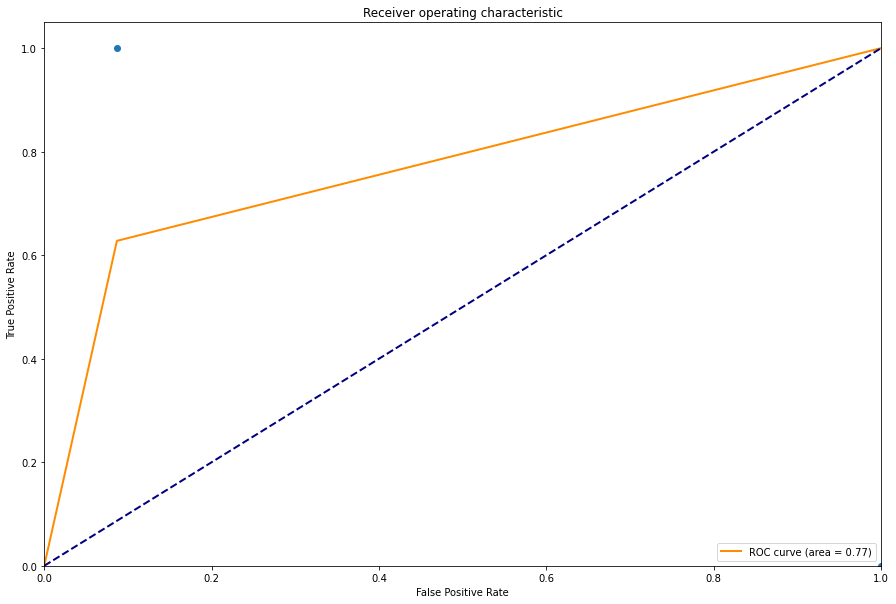

0.7703920443923875

In [9]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No Tiene Alto Valor Adquisitivo', 'Tiene Alto Valor Adquisitivo']))
graficar_auc_roc(y_test,y_pred)

                                 precision    recall  f1-score   support

No Tiene Alto Valor Adquisitivo       0.88      0.89      0.88      6159
   Tiene Alto Valor Adquisitivo       0.64      0.61      0.63      1982

                       accuracy                           0.82      8141
                      macro avg       0.76      0.75      0.75      8141
                   weighted avg       0.82      0.82      0.82      8141



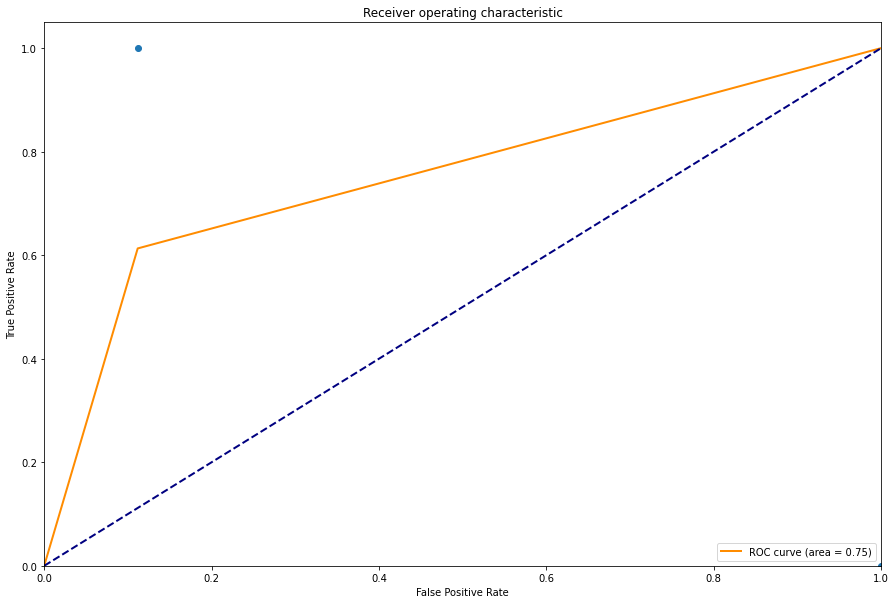

0.7506553542689531

In [10]:
X_train = normalizar_datos(X_train)
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No Tiene Alto Valor Adquisitivo', 'Tiene Alto Valor Adquisitivo']))
graficar_auc_roc(y_test,y_pred)

# Busqueda de hiperparametros

In [8]:
def definir_mejores_hiperparametros(X, y):    
    metrics = []
    for distancia in ['uniform', 'distance']:
        for metrica in ['minkowski','cosine','chebyshev','correlation']:
            for k in [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]: 
                kf = KFold(n_splits=5)
                for fold_index, (train_index, test_index) in enumerate(kf.split(X)):
                    print(k)
                    knn = KNeighborsClassifier(n_neighbors=k, weights=distancia, metric=metrica)
                    knn.fit(X.iloc[train_index], y.iloc[train_index])
                    y_pred = knn.predict(X.iloc[test_index])
                    metrics.append((k,distancia,metrica,roc_auc_score(y.iloc[test_index], y_pred)))
                
    df_metrics = pd.DataFrame(metrics, columns=['cant_vecinos','distancia','metrica','rocauc'])
    mejor_combinacion = df_metrics[df_metrics["rocauc"] ==  max(df_metrics.rocauc)]   
    return mejor_combinacion

In [9]:
mejor_combinacion = definir_mejores_hiperparametros(X, y)
print(mejor_combinacion)

2
2
2
2
2
3
3
3
3
3
4
4
4
4
4
5
5
5
5
5
6
6
6
6
6
7
7
7
7
7
8
8
8
8
8
9
9
9
9
9
10
10
10
10
10
15
15
15
15
15
20
20
20
20
20
25
25
25
25
25
30
30
30
30
30
35
35
35
35
35
40
40
40
40
40
45
45
45
45
45
50
50
50
50
50
2
2
2
2
2
3
3
3
3
3
4
4
4
4
4
5
5
5
5
5
6
6
6
6
6
7
7
7
7
7
8
8
8
8
8
9
9
9
9
9
10
10
10
10
10
15
15
15
15
15
20
20
20
20
20
25
25
25
25
25
30
30
30
30
30
35
35
35
35
35
40
40
40
40
40
45
45
45
45
45
50
50
50
50
50
2
2
2
2
2
3
3
3
3
3
4
4
4
4
4
5
5
5
5
5
6
6
6
6
6
7
7
7
7
7
8
8
8
8
8
9
9
9
9
9
10
10
10
10
10
15
15
15
15
15
20
20
20
20
20
25
25
25
25
25
30
30
30
30
30
35
35
35
35
35
40
40
40
40
40
45
45
45
45
45
50
50
50
50
50
2
2
2
2
2
3
3
3
3
3
4
4
4
4
4
5
5
5
5
5
6
6
6
6
6
7
7
7
7
7
8
8
8
8
8
9
9
9
9
9
10
10
10
10
10
15
15
15
15
15
20
20
20
20
20
25
25
25
25
25
30
30
30
30
30
35
35
35
35
35
40
40
40
40
40
45
45
45
45
45
50
50
50
50
50
2
2
2
2
2
3
3
3
3
3
4
4
4
4
4
5
5
5
5
5
6
6
6
6
6
7
7
7
7
7
8
8
8
8
8
9
9
9
9
9
10
10
10
10
10
15
15
15
15
15
20
20
20
20
20
25
25
25
25
25


In [10]:
parametros_knn = mejor_combinacion.loc[:].values[0]
knn = KNeighborsClassifier(n_neighbors=parametros_knn[0], weights=parametros_knn[1], metric=parametros_knn[2])
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No Tiene Alto Valor Adquisitivo', 'Tiene Alto Valor Adquisitivo']))

                                 precision    recall  f1-score   support

No Tiene Alto Valor Adquisitivo       0.88      0.91      0.90      6159
   Tiene Alto Valor Adquisitivo       0.70      0.63      0.66      1982

                       accuracy                           0.84      8141
                      macro avg       0.79      0.77      0.78      8141
                   weighted avg       0.84      0.84      0.84      8141



In [12]:
# Faltan otras métricas (AUC-ROC, matriz de confusión)

In [14]:
X_train = normalizar_datos(X_train)
knn = KNeighborsClassifier(n_neighbors=parametros_knn[0], weights=parametros_knn[1], metric=parametros_knn[2])
knn.fit(X_train, y_train)

NameError: name 'preprocessing' is not defined

In [ ]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No Tiene Alto Valor Adquisitivo', 'Tiene Alto Valor Adquisitivo']))